In [1]:
import pandas as pd
pd.set_option("display.max.columns", None)
import numpy as np

import matplotlib.pyplot as plt
#to avoid `plt.show;` again and again
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from  matplotlib.ticker import PercentFormatter



# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

In [2]:
# import dataset and print first 5 rows

df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")
df.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [3]:
# How many rows and cols?
print(f"The dataset is composed of {df.shape[0]} rows and {df.shape[1]} columns.")

print()

# How many unique particiapnts?
print(f'There is {df["iid"].nunique()} participants in the Speed Dating survey.')


The dataset is composed of 8378 rows and 195 columns.

There is 551 participants in the Speed Dating survey.


In [4]:
# drop duplicate iid and keep only the first one

df = df.drop_duplicates(subset="iid", keep="first")


In [5]:
# Create a sub dataset with only the columns I need

mydf = df[
    [
        "iid",
        "gender",
        "match",
        "int_corr",
        "age_o",
        "age",
        "field_cd",
        "race",
        "goal",
        "date",
        "go_out",
        "sports",
        "tvsports",
        "exercise",
        "dining",
        "museums",
        "art",
        "hiking",
        "gaming",
        "clubbing",
        "reading",
        "tv",
        "theater",
        "movies",
        "concerts",
        "music",
        "shopping",
        "yoga",
        "attr1_1",
        "sinc1_1",
        "intel1_1",
        "fun1_1",
        "amb1_1",
        "shar1_1",
    ]
]


In [6]:
# Rename selected columns

mydf = mydf.rename(
    columns={
        "iid": "ID",
        "int_corr": "correlation",
        "age_o": "age_partner",
        "field_cd": "field",
    }
)

mydf


,ID,gender,match,correlation,age_partner,age,field,race,goal,date,go_out,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,1,0,0,0.14,27.0,21.0,1.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0
10,2,0,0,0.29,27.0,24.0,1.0,2.0,1.0,5.0,1.0,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,45.0,5.0,25.0,20.0,0.0,5.0
20,3,0,0,-0.24,27.0,25.0,2.0,2.0,6.0,3.0,1.0,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,35.0,10.0,35.0,10.0,10.0,0.0
30,4,0,0,-0.18,27.0,23.0,1.0,2.0,1.0,5.0,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,20.0,20.0,20.0,20.0,10.0,10.0
40,5,0,0,-0.43,27.0,21.0,1.0,2.0,2.0,4.0,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,20.0,5.0,25.0,25.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8268,548,1,1,0.23,28.0,30.0,8.0,2.0,1.0,6.0,1.0,10.0,8.0,4.0,10.0,3.0,2.0,2.0,5.0,1.0,9.0,6.0,4.0,6.0,7.0,10.0,4.0,1.0,40.0,10.0,20.0,10.0,0.0,20.0
8290,549,1,0,0.43,28.0,28.0,8.0,2.0,1.0,7.0,1.0,8.0,5.0,6.0,9.0,7.0,7.0,4.0,8.0,8.0,7.0,7.0,8.0,8.0,10.0,10.0,8.0,2.0,20.0,20.0,20.0,20.0,0.0,20.0
8312,550,1,0,0.65,28.0,30.0,8.0,2.0,2.0,4.0,1.0,5.0,3.0,5.0,9.0,7.0,8.0,3.0,3.0,8.0,8.0,3.0,7.0,7.0,4.0,6.0,6.0,3.0,30.0,3.0,30.0,30.0,3.0,4.0
8334,551,1,0,0.62,28.0,27.0,8.0,1.0,1.0,6.0,3.0,6.0,1.0,7.0,6.0,7.0,3.0,2.0,1.0,7.0,10.0,2.0,5.0,6.0,7.0,7.0,7.0,1.0,40.0,20.0,20.0,20.0,0.0,0.0


In [7]:
# replace coded cols with names

mydf["gender"] = mydf.gender.map({1: "Male", 0: "Female"})

mydf["race"] = mydf["race"].replace(
    {
        1: "Noire",
        2: "Caucasienne",
        3: "Latino",
        4: "Asiatique",
        5: "Americaine",
        6: "Autre",
    }
)

mydf["goal"] = mydf["goal"].replace(
    {
        1: "fun",
        2: "rencontres",
        3: "RDV",
        4: "relation serieuse",
        5: "I did it",
        6: "Autre",
    }
)

mydf["date"] = mydf["date"].replace(
    {
        1: "several/week",
        2: "2/week",
        3: "1/week",
        4: " 2/month",
        5: "1/month",
        6: "several/year",
        7: "almost none",
    }
)

mydf["go_out"] = mydf["go_out"].replace(
    {
        1: "several/week",
        2: "2/week",
        3: "1/week",
        4: " 2/month",
        5: "1/month",
        6: "several/year",
        7: "almost none",
    }
)

mydf["field"] = mydf["field"].replace(
    {
        1: "Avocat",
        2: "Math",
        3: "Sciences sociales, Psychologue",
        4: "Sciences médicales, pharmaceutiques et biotech",
        5: "Ingénierie",
        6: "Anglais/Écriture Créative/Journalisme",
        7: "Histoire/Religion/Philosophie",
        8: "Entreprise/Finance",
        9: "Éducation, Académie",
        10: "Sciences Biologiques/Chimie/Physique",
        11: "Travail Social",
        12: "Undergrad/indécis",
        13: "Science politique/Affaires internationales",
        14: "Cinéma",
        15: "Administration des Arts",
        16: "Langues",
        17: "Architecture",
        18: "Autre",
    }
)

mydf


,ID,gender,match,correlation,age_partner,age,field,race,goal,date,go_out,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,1,Female,0,0.14,27.0,21.0,Avocat,Asiatique,rencontres,almost none,several/week,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0
10,2,Female,0,0.29,27.0,24.0,Avocat,Caucasienne,fun,1/month,several/week,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,45.0,5.0,25.0,20.0,0.0,5.0
20,3,Female,0,-0.24,27.0,25.0,Math,Caucasienne,Autre,1/week,several/week,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,35.0,10.0,35.0,10.0,10.0,0.0
30,4,Female,0,-0.18,27.0,23.0,Avocat,Caucasienne,fun,1/month,several/week,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,20.0,20.0,20.0,20.0,10.0,10.0
40,5,Female,0,-0.43,27.0,21.0,Avocat,Caucasienne,rencontres,2/month,several/week,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,20.0,5.0,25.0,25.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8268,548,Male,1,0.23,28.0,30.0,Entreprise/Finance,Caucasienne,fun,several/year,several/week,10.0,8.0,4.0,10.0,3.0,2.0,2.0,5.0,1.0,9.0,6.0,4.0,6.0,7.0,10.0,4.0,1.0,40.0,10.0,20.0,10.0,0.0,20.0
8290,549,Male,0,0.43,28.0,28.0,Entreprise/Finance,Caucasienne,fun,almost none,several/week,8.0,5.0,6.0,9.0,7.0,7.0,4.0,8.0,8.0,7.0,7.0,8.0,8.0,10.0,10.0,8.0,2.0,20.0,20.0,20.0,20.0,0.0,20.0
8312,550,Male,0,0.65,28.0,30.0,Entreprise/Finance,Caucasienne,rencontres,2/month,several/week,5.0,3.0,5.0,9.0,7.0,8.0,3.0,3.0,8.0,8.0,3.0,7.0,7.0,4.0,6.0,6.0,3.0,30.0,3.0,30.0,30.0,3.0,4.0
8334,551,Male,0,0.62,28.0,27.0,Entreprise/Finance,Noire,fun,several/year,1/week,6.0,1.0,7.0,6.0,7.0,3.0,2.0,1.0,7.0,10.0,2.0,5.0,6.0,7.0,7.0,7.0,1.0,40.0,20.0,20.0,20.0,0.0,0.0


In [8]:
# Checking missing values percentage in each column

print((100 * mydf.isnull().sum() / mydf.shape[0]).sort_values(ascending=False))


shar1_1        1.814882
amb1_1         1.633394
age            1.451906
date           1.451906
fun1_1         1.451906
intel1_1       1.270417
sinc1_1        1.270417
attr1_1        1.270417
yoga           1.270417
gaming         1.270417
shopping       1.270417
music          1.270417
concerts       1.270417
movies         1.270417
theater        1.270417
tv             1.270417
reading        1.270417
clubbing       1.270417
hiking         1.270417
art            1.270417
museums        1.270417
dining         1.270417
exercise       1.270417
tvsports       1.270417
sports         1.270417
go_out         1.270417
goal           1.270417
field          1.270417
correlation    1.270417
race           1.088929
gender         0.000000
age_partner    0.000000
match          0.000000
ID             0.000000
dtype: float64


# Speed Dating - Part II

Let's try to produce our first visualisations with Seaborn. Based on the exploration you realized, try to find good representations of the dataset that allow to summarize some statistics as well as relationships between variables. 

In [9]:
mydf


,ID,gender,match,correlation,age_partner,age,field,race,goal,date,go_out,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,1,Female,0,0.14,27.0,21.0,Avocat,Asiatique,rencontres,almost none,several/week,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0
10,2,Female,0,0.29,27.0,24.0,Avocat,Caucasienne,fun,1/month,several/week,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,45.0,5.0,25.0,20.0,0.0,5.0
20,3,Female,0,-0.24,27.0,25.0,Math,Caucasienne,Autre,1/week,several/week,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,35.0,10.0,35.0,10.0,10.0,0.0
30,4,Female,0,-0.18,27.0,23.0,Avocat,Caucasienne,fun,1/month,several/week,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,20.0,20.0,20.0,20.0,10.0,10.0
40,5,Female,0,-0.43,27.0,21.0,Avocat,Caucasienne,rencontres,2/month,several/week,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,20.0,5.0,25.0,25.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8268,548,Male,1,0.23,28.0,30.0,Entreprise/Finance,Caucasienne,fun,several/year,several/week,10.0,8.0,4.0,10.0,3.0,2.0,2.0,5.0,1.0,9.0,6.0,4.0,6.0,7.0,10.0,4.0,1.0,40.0,10.0,20.0,10.0,0.0,20.0
8290,549,Male,0,0.43,28.0,28.0,Entreprise/Finance,Caucasienne,fun,almost none,several/week,8.0,5.0,6.0,9.0,7.0,7.0,4.0,8.0,8.0,7.0,7.0,8.0,8.0,10.0,10.0,8.0,2.0,20.0,20.0,20.0,20.0,0.0,20.0
8312,550,Male,0,0.65,28.0,30.0,Entreprise/Finance,Caucasienne,rencontres,2/month,several/week,5.0,3.0,5.0,9.0,7.0,8.0,3.0,3.0,8.0,8.0,3.0,7.0,7.0,4.0,6.0,6.0,3.0,30.0,3.0,30.0,30.0,3.0,4.0
8334,551,Male,0,0.62,28.0,27.0,Entreprise/Finance,Noire,fun,several/year,1/week,6.0,1.0,7.0,6.0,7.0,3.0,2.0,1.0,7.0,10.0,2.0,5.0,6.0,7.0,7.0,7.0,1.0,40.0,20.0,20.0,20.0,0.0,0.0


il y a 274 femmes et 277 hommes qui ont participé a cette etude

551 participants of this study


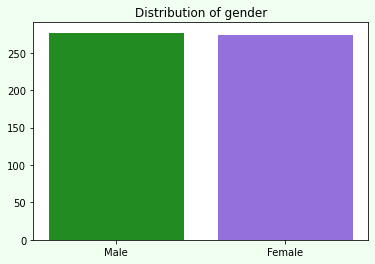

In [10]:
# Distribution of genders

plt.style.use("seaborn-muted")

plt.figure(figsize=(6, 4), facecolor="honeydew")

plt.bar(
    mydf["gender"].value_counts().index,
    mydf["gender"].value_counts().values,
    color=["forestgreen", "mediumpurple"],
)
plt.title("Distribution of gender")

print(
    f'il y a {mydf["gender"].value_counts()["Female"]} femmes et {mydf["gender"].value_counts()["Male"]} hommes qui ont participé a cette etude'
)
print()
print(f"{mydf.shape[0]} participants of this study")


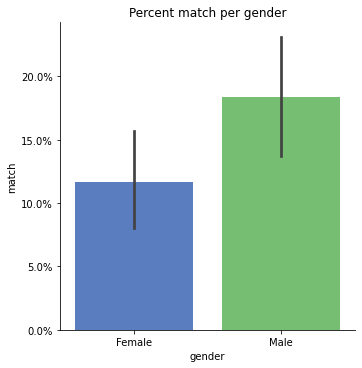

In [11]:
# Percent match per gender

plot = sns.catplot(data=mydf[['gender','match']],x='gender',y='match',kind='bar')
plt.title('Percent match per gender');

for ax in plot.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

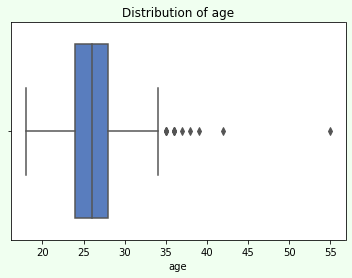

In [12]:
# Distribution of age

plt.style.use("seaborn-muted")
plt.figure(figsize=(6, 4), facecolor="honeydew")

sns.boxplot(x=df["age"])
plt.title("Distribution of age");


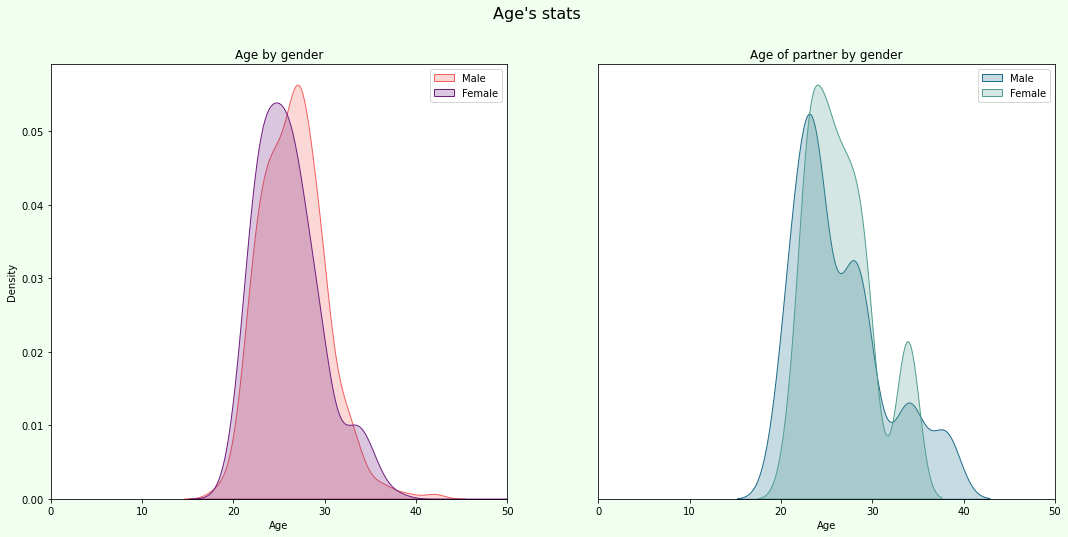

In [13]:
# Distribution of age by gender
plt.figure(figsize=(18, 8), facecolor="honeydew")
plt.suptitle("Age's stats", fontsize=16)

plt.subplot(1, 2, 1)
sns.kdeplot(data=mydf, x="age", hue="gender", fill=True, palette="magma")
plt.title("Age by gender")
plt.xlabel("Age")
plt.xlim(0, 50)
plt.legend(loc="upper right", labels=["Male", "Female"])

plt.subplot(1, 2, 2)
sns.kdeplot(data=mydf, x="age_partner", hue="gender", fill=True, palette="crest")
plt.title("Age of partner by gender")
plt.xlabel("Age")
plt.xlim(0, 50)
plt.ylabel("")
plt.yticks([])
plt.legend(loc="upper right", labels=["Male", "Female"]);


In [14]:
# Distribution of field of work

r = mydf.value_counts("field")

# Polar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=r.values, theta=r.keys(), line_color="darksalmon"))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 70]),
        radialaxis_showticklabels=False,
        radialaxis_showline=False,
    ),
    height=600,
    title={"x": 0.5},
    title_text="Fields of work for",
    template="ggplot2",
)

fig.update_polars(angularaxis_direction="clockwise")

fig.update_traces(fill="toself")


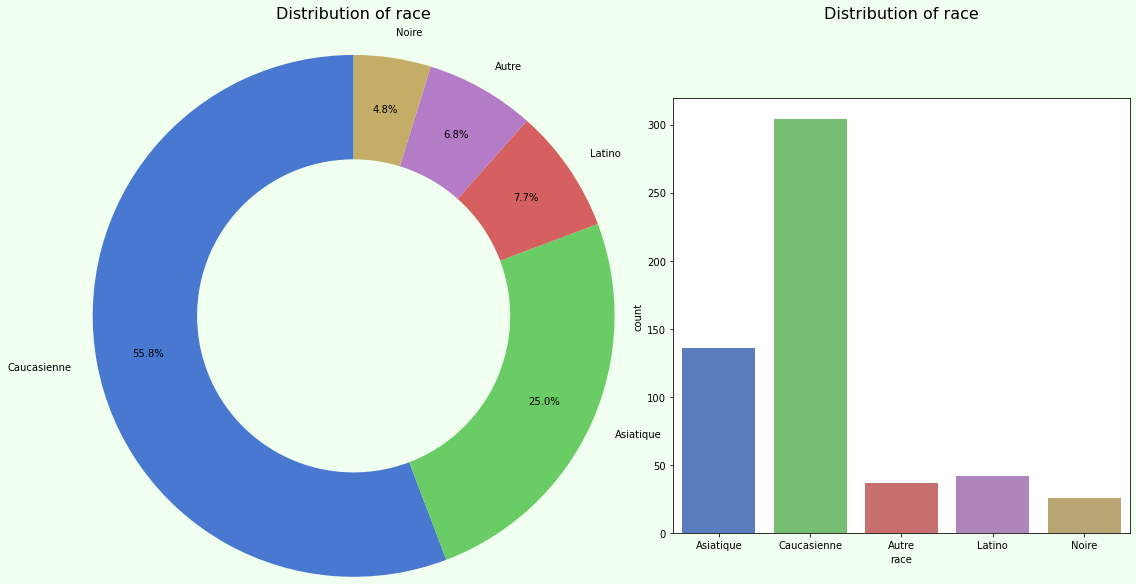

In [15]:
# Distribution of race

plt.style.use("seaborn-muted")

plt.figure(figsize=(18, 8), facecolor="honeydew")

plt.subplot(1, 2, 1)
plt.pie(
    mydf["race"].value_counts().values,
    radius=1.5,
    labels=mydf["race"].value_counts().index,
    startangle=90,
    wedgeprops=dict(width=0.6),
    autopct="%1.1f%%",
    pctdistance=0.8,
)
plt.title("Distribution of race", pad=80, fontsize=16)

plt.subplot(1, 2, 2)
sns.countplot(data=mydf[["race", "match"]], x="race")
plt.title("Distribution of race", pad=80, fontsize=16);


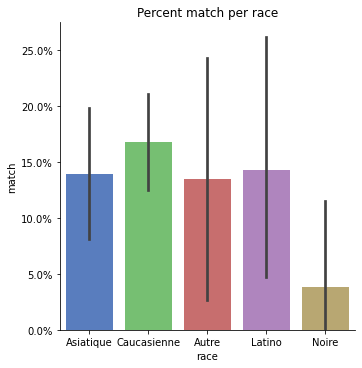

In [16]:
# Percent match per race

plot = sns.catplot(data=mydf[['race','match']],x='race',y='match',kind='bar')
plt.title('Percent match per race');

for ax in plot.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

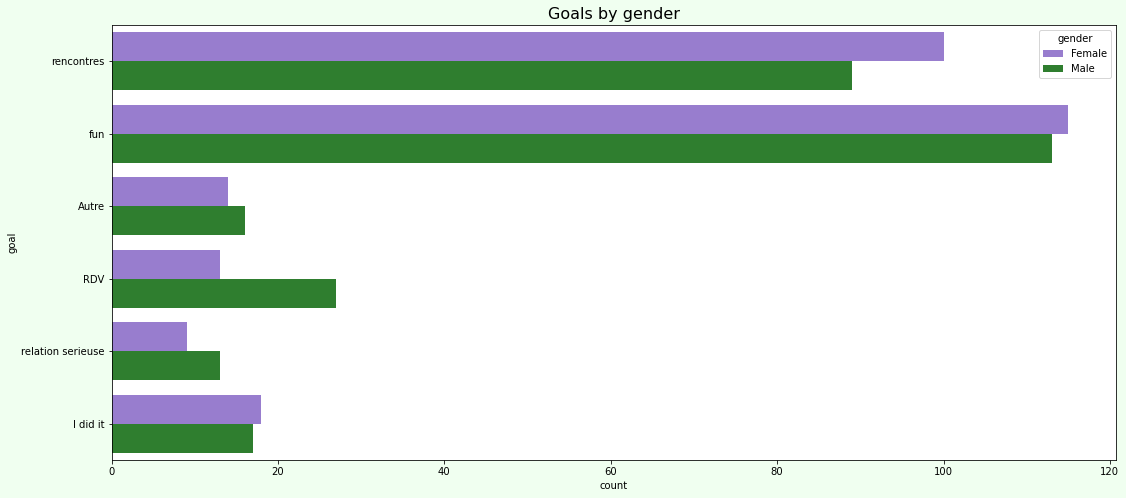

In [17]:
# Distribution of goal
plt.figure(figsize=(18, 8), facecolor="honeydew")

sns.countplot(
    y="goal", data=mydf, hue="gender", palette=["mediumpurple", "forestgreen"]
)
plt.title("Goals by gender", fontsize=16);


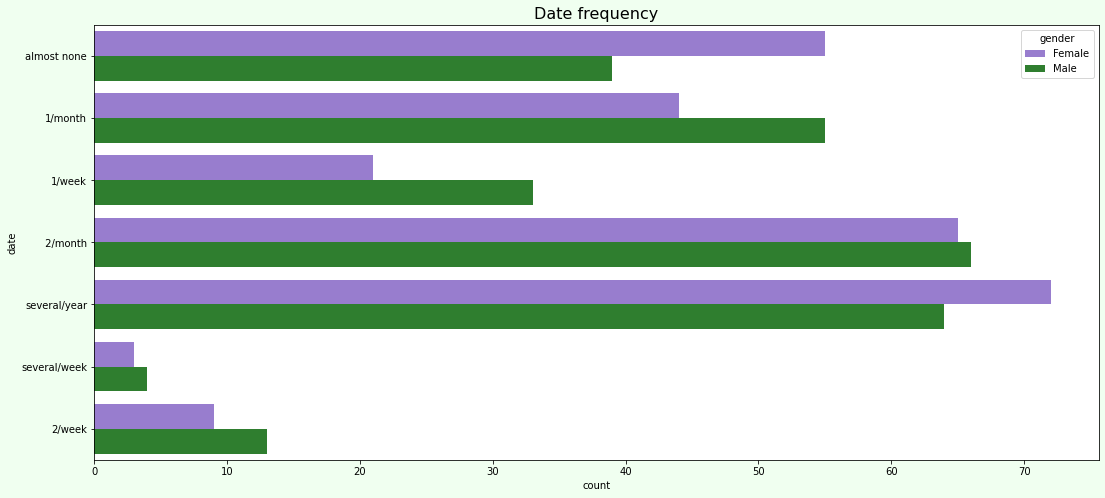

In [18]:
# How many date
plt.figure(figsize=(18, 8), facecolor="honeydew")

sns.countplot(
    y="date", data=mydf, hue="gender", palette=["mediumpurple", "forestgreen"]
)
plt.title("Date frequency", fontsize=16);


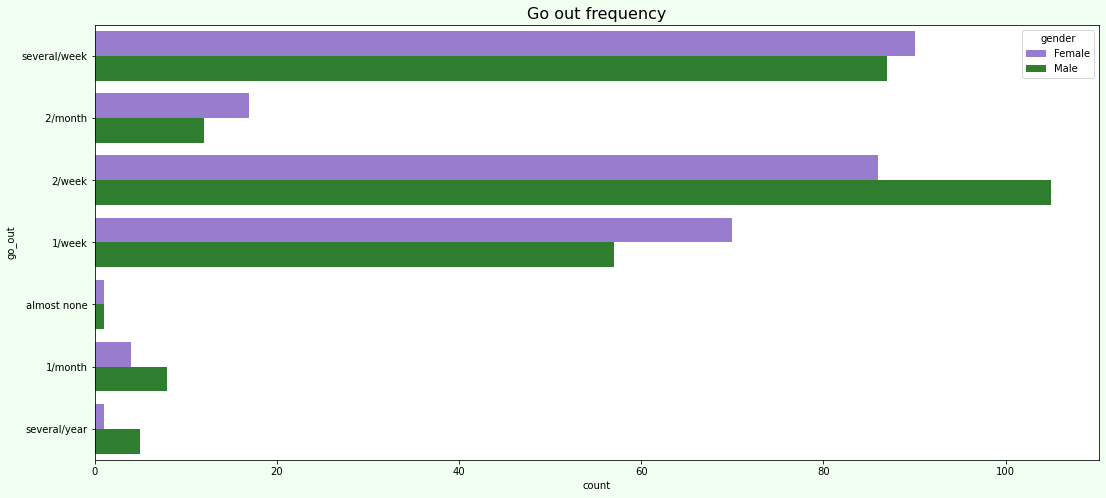

In [19]:
# How many time do you go out
plt.figure(figsize=(18, 8), facecolor="honeydew")

sns.countplot(
    y="go_out", data=mydf, hue="gender", palette=["mediumpurple", "forestgreen"]
)
plt.title("Go out frequency", fontsize=16);


In [20]:
# Interest per activity

hobby = [
    "sports",
    "tvsports",
    "exercise",
    "dining",
    "museums",
    "art",
    "hiking",
    "gaming",
    "clubbing",
    "reading",
    "tv",
    "theater",
    "movies",
    "concerts",
    "music",
    "shopping",
    "yoga",
]

activities = mydf.groupby("gender")[hobby].mean()
activities
trace0 = go.Bar(
    x=activities.columns.values,
    y=activities.iloc[0],
    name="Female",
    marker=dict(color="mediumpurple"),
)
trace1 = go.Bar(
    x=activities.columns.values,
    y=activities.iloc[1],
    name="Male",
    marker=dict(color="forestgreen"),
)

data = [trace0, trace1]
layout = go.Layout(
    title="Interest by activity of Men vs Women",
    title_x=0.5,
    font=dict(size=16),
    barmode="group",
    xaxis={"categoryorder": "total descending"},
    legend=dict(font=dict(size=16)),
)
fig = go.Figure(data=data, layout=layout)
fig.show()


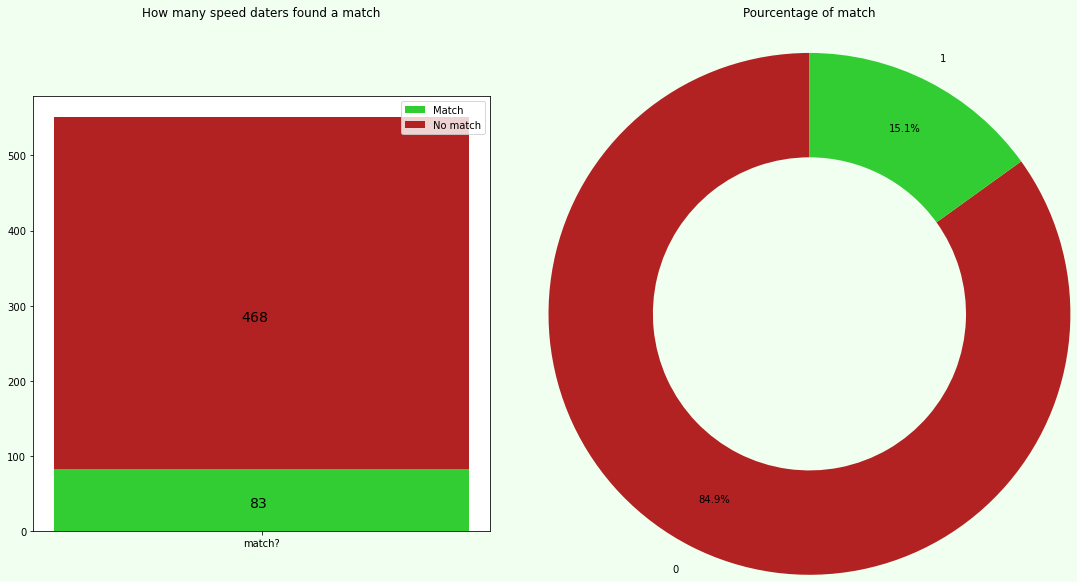

In [21]:
# distibution of match
x = ["match?"]
match = df["match"].value_counts()[1]
nomatch = df["match"].value_counts()[0]

colors = ["firebrick", "limegreen"]

plt.figure(figsize=(18, 8), facecolor="honeydew")

plt.subplot(1, 2, 1)
plt.bar(x, match, color="limegreen")
plt.bar(x, nomatch, bottom=match, color="firebrick")
plt.legend(["Match", "No match"])
plt.text(-0.025, 32, r"$83$", fontsize=14)
plt.text(-0.04, 280, r"$468$", fontsize=14)

plt.title("How many speed daters found a match", pad=80)

plt.subplot(1, 2, 2)
plt.pie(
    mydf["match"].value_counts().values,
    radius=1.5,
    labels=mydf["match"].value_counts().index,
    startangle=90,
    wedgeprops=dict(width=0.6),
    autopct="%1.1f%%",
    pctdistance=0.8,
    colors=colors,
)
plt.title("Pourcentage of match", pad=80);


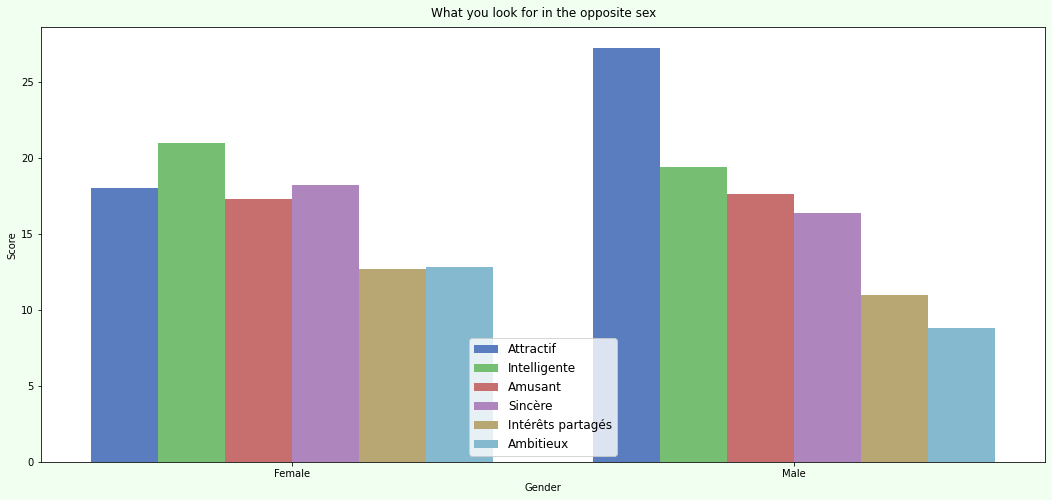

In [22]:
# what you look for in the opposite sex
df_research = mydf.groupby("gender")[
    ["gender", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
].mean()
cols = [
    "Attractif",
    "Sincère",
    "Intelligente",
    "Amusant",
    "Ambitieux",
    "Intérêts partagés",
]
df_research.columns = cols
df_research = df_research.reset_index()

research = df_research.melt(id_vars="gender").rename(columns=str.title)

fig, ax = plt.subplots(figsize=(18, 8), facecolor="honeydew")


def hue_order():
    for g in research.Gender.unique():
        temp_df = research[research["Gender"] == g]
        order = temp_df.sort_values("Value", ascending=False)["Variable"]
    return order


sns.barplot(
    x="Gender", y="Value", hue="Variable", data=research, hue_order=hue_order(), ax=ax
)
plt.ylabel("Score")
plt.legend(loc=8, fontsize=12)
plt.title("What you look for in the opposite sex", pad=10);
